In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
rsem_m1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/1_RNA-Seq_SRR12849888.genes.results', sep = '\t')
rsem_m2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/2_RNA-Seq_SRR12849889.genes.results', sep = '\t')
rsem_m3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/3_RNA-Seq_SRR12849891.genes.results', sep = '\t')
rsem_m4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/4_RNA-Seq_SRR12849892.genes.results', sep = '\t')


In [3]:
rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].str.startswith('Hsap38')]
rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].str.startswith('Hsap38')]
rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].str.startswith('Hsap38')]
rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].str.startswith('Hsap38')]


In [4]:
def count_breadth(expression_df):
    breadth = len(expression_df[expression_df['TPM'] > 1] )    
    return breadth

def count_abundance(expression_df):
    abundance = expression_df['TPM'].sum()
    return abundance

In [80]:
m1_breadth = count_breadth(rsem_erv_1)
m1_abundance = count_abundance(rsem_erv_1)

m2_breadth = count_breadth(rsem_erv_2)
m2_abundance = count_abundance(rsem_erv_2)

m3_breadth = count_breadth(rsem_erv_3)
m3_abundance = count_abundance(rsem_erv_3)

m4_breadth = count_breadth(rsem_erv_4)
m4_abundance = count_abundance(rsem_erv_4)



In [81]:
print('m1 breadth : {} m1 abundance {} '.format(m1_breadth, m1_abundance))
print('m2 breadth : {} m2 abundance {} '.format(m2_breadth, m2_abundance))
print('m3 breadth : {} m3 abundance {} '.format(m3_breadth, m3_abundance))
print('m4 breadth : {} m4 abundance {} '.format(m4_breadth, m4_abundance))

m1 breadth : 329 m1 abundance 2584.25 
m2 breadth : 385 m2 abundance 2706.9199999999996 
m3 breadth : 288 m3 abundance 3182.4300000000003 
m4 breadth : 387 m4 abundance 3769.3399999999997 


In [5]:
def filter_zero_expr(df):
    df_cp = df.copy()
    df_cp = df_cp[df_cp['TPM'] > 0 ]
    return df_cp
    

In [6]:
rsem_erv_1 = filter_zero_expr(rsem_erv_1)
rsem_erv_2 = filter_zero_expr(rsem_erv_2)
rsem_erv_3 = filter_zero_expr(rsem_erv_3)
rsem_erv_4 = filter_zero_expr(rsem_erv_4)

In [67]:
#read in the overexpressed ERVs that we got form DESEQ2 
file = open('ERV_names.txt')

overexpressed_ERVs = file.read() 
overexpressed_ERVs_list = overexpressed_ERVs.split('\n')[:-1]
print(len(overexpressed_ERVs_list))

#get just first 20 
overexpressed_20 = overexpressed_ERVs_list[:20]

signdiff = ['Hsap38.chr5.103087901.103088227.-', 'Hsap38.chr7.94663299.94664531.+', 'Hsap38.chr7.94664474.94665679.+']



136


GET ONLY THE OVEREXPRESSED ERVS

In [69]:
rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].isin(overexpressed_ERVs_list)]
rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].isin(overexpressed_ERVs_list)]

print(rsem_erv_1)

                                 gene_id                   transcript_id(s)  \
61273  Hsap38.chr1.161432309.161432788.-  Hsap38.chr1.161432309.161432788.-   
61479  Hsap38.chr1.174844047.174847295.-  Hsap38.chr1.174844047.174847295.-   
61480  Hsap38.chr1.175103294.175103704.-  Hsap38.chr1.175103294.175103704.-   
61481  Hsap38.chr1.175103876.175104337.-  Hsap38.chr1.175103876.175104337.-   
61482  Hsap38.chr1.175104392.175105102.-  Hsap38.chr1.175104392.175105102.-   
...                                  ...                                ...   
90704  Hsap38.chrX.107052509.107054017.-  Hsap38.chrX.107052509.107054017.-   
91594    Hsap38.chrX.16180209.16180451.-    Hsap38.chrX.16180209.16180451.-   
91842    Hsap38.chrX.37483703.37484035.+    Hsap38.chrX.37483703.37484035.+   
91926      Hsap38.chrX.4542780.4543313.-      Hsap38.chrX.4542780.4543313.-   
91974      Hsap38.chrX.4894484.4895017.+      Hsap38.chrX.4894484.4895017.+   

       length  effective_length  expected_count    

In [86]:
#rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].isin(signdiff)]
#rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].isin(signdiff)]
#rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].isin(signdiff)]
#rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].isin(signdiff)]


In [87]:
#rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].isin(overexpressed_20)]
#rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].isin(overexpressed_20)]
#rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].isin(overexpressed_20)]
#rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].isin(overexpressed_20)]

In [72]:

mouse_list = [rsem_erv_1, rsem_erv_2, rsem_erv_3, rsem_erv_4]
#columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'TPM', 'FPKM']
columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'expected_count', 'FPKM']

ctr = 1
full_df = pd.DataFrame()

for mouse in mouse_list:
    mouse = mouse.copy()
    #print(mouse)
    #print(len(mouse))
    mouse['patient_id'] = ctr
    mouse.drop(columns=columns_to_drop, inplace=True)
    #print(mouse)
    full_df = pd.concat([full_df, mouse], ignore_index=True)
    ctr += 1

print(full_df)


                               gene_id    TPM  patient_id
0    Hsap38.chr1.161432309.161432788.-   1.15           1
1    Hsap38.chr1.174844047.174847295.-   0.61           1
2    Hsap38.chr1.175103294.175103704.-  10.71           1
3    Hsap38.chr1.175103876.175104337.-   7.69           1
4    Hsap38.chr1.175104392.175105102.-   7.44           1
..                                 ...    ...         ...
539  Hsap38.chrX.107052509.107054017.-   0.22           4
540    Hsap38.chrX.16180209.16180451.-   8.17           4
541    Hsap38.chrX.37483703.37484035.+  12.36           4
542      Hsap38.chrX.4542780.4543313.-   3.45           4
543      Hsap38.chrX.4894484.4895017.+   1.86           4

[544 rows x 3 columns]


APPLY THE LOGARITHM TRANSFORMATION OF THE TPM VALUES

In [73]:
full_df_2 = full_df.copy()
full_df['TPM_log'] = np.log1p(full_df['TPM'])


In [74]:
def extract_chrom(df):
    pattern = r"^Hsap38\.(chr[^.]+)\."
    df['chrom'] = df['gene_id'].str.extract(pattern)
    return df
    
def extract_start_pos(df):
    pattern = r"^Hsap38\.[^.]+\.([^.]+)\."
    df['start'] = df['gene_id'].str.extract(pattern)
    df.astype({'start': 'int32'}).dtypes
    return df

Extract info about the chromosome and start position of the ERV 

In [75]:
full_df = extract_chrom(full_df)
full_df = extract_start_pos(full_df)

full_df_2 = extract_chrom(full_df)
full_df_2 = extract_start_pos(full_df)

In [76]:
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gene_id     544 non-null    object 
 1   TPM         544 non-null    float64
 2   patient_id  544 non-null    int64  
 3   TPM_log     544 non-null    float64
 4   chrom       544 non-null    object 
 5   start       544 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 25.6+ KB
None


MAKE HEATMAP FOR PATIENTS SEPARATELY

In [77]:
pat_1 = full_df[full_df['patient_id'] == 1]
pat_2 = full_df[full_df['patient_id'] == 2]
pat_3 = full_df[full_df['patient_id'] == 3]
pat_4 = full_df[full_df['patient_id'] == 4]

In [78]:
rows = list(pat_1['gene_id'])
columns = list(pat_1['chrom'].unique())
#TO MOZE BYC ZLE 

In [79]:
#make an empty df of a required dimensions
heatmap = pd.DataFrame(np.zeros((len(rows), len(columns))), index=rows, columns=columns)

In [80]:
for index, row in pat_1.iterrows():
    heatmap.loc[row['gene_id'], row['chrom']] = row['TPM_log']

PLOT PAT1 HEATMAP 

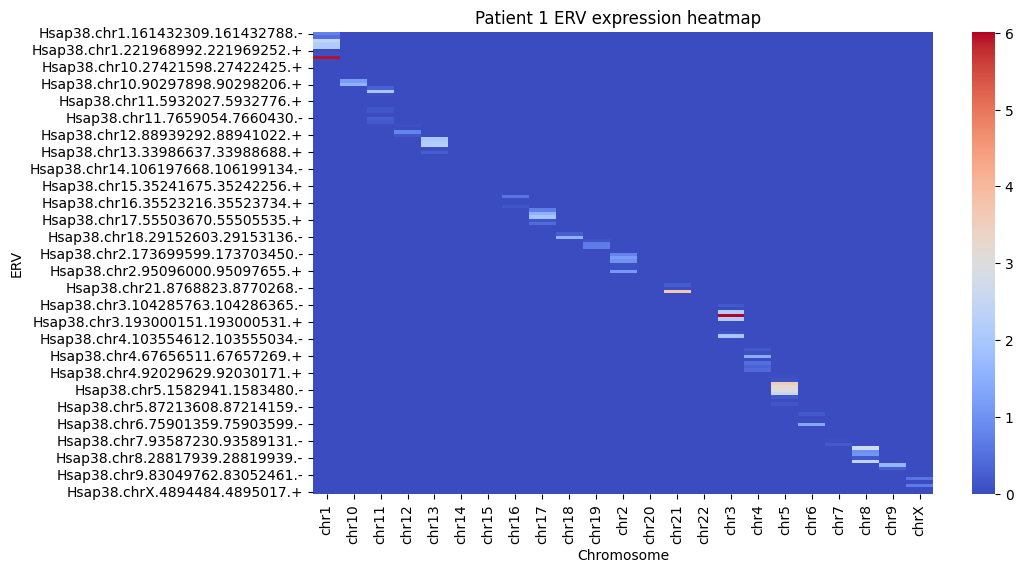

In [81]:
plt.figure(figsize=(10, 6))

# Plot heatmap using seaborn
sns.heatmap(heatmap, cmap='coolwarm')

# Add title and labels
plt.title('Patient 1 ERV expression heatmap  ')
plt.xlabel('Chromosome')
plt.ylabel('ERV')

# Show plot
plt.show()

MAKE HEATMAP FOR THE WHOLE DATASET

In [82]:
print(len(rows))
print(len(pat_1['gene_id'].unique()))

heatmap_full = pd.DataFrame(np.zeros((len(overexpressed_ERVs_list), len(columns))), index=overexpressed_ERVs_list, columns=columns)
heatmap_full_2 = pd.DataFrame(np.zeros((len(rows), len(columns))), index=rows, columns=columns)
print(heatmap_full.shape)

136
136
(136, 23)


In [83]:
#print(pat_1)

In [84]:
cont_merged = pd.merge(pat_1, pat_2, on = ['gene_id'], suffixes = ['_cont1', '_cont2'])
mut_merged = pd.merge(pat_3, pat_4, on = ['gene_id'], suffixes = ['_mut1', '_mut2'])

In [85]:
full_df = pd.merge(cont_merged, mut_merged, on = ['gene_id'])

In [86]:
full_df['TPM_diff_log'] = (full_df['TPM_log_cont1'] + full_df['TPM_log_cont2'])/2 - (full_df['TPM_log_mut1']+ full_df['TPM_log_mut2'])/2
full_df['chrom'] = full_df['chrom_cont2'] 
#print(full_df)

In [87]:
full_df['TPM_diff'] = (full_df['TPM_cont1'] + full_df['TPM_cont2'])/2 - (full_df['TPM_mut1']+ full_df['TPM_mut2'])/2
#now take the log 
full_df['TPM_diff'] = np.log1p(full_df['TPM_diff'])
full_df['chrom'] = full_df['chrom_cont2'] 

/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/work/iku/exp1019-cancer-epigenetics-and-ervs/virt/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [88]:
full_df_small = full_df[['gene_id', 'chrom', 'TPM_diff_log']]

In [89]:
full_df_small_2 = full_df[['gene_id', 'chrom', 'TPM_diff']]

In [90]:
for index, row in full_df_small.iterrows():
    heatmap_full.loc[row['gene_id'], row['chrom']] = row['TPM_diff_log']

In [91]:
for index, row in full_df_small_2.iterrows():
    heatmap_full_2.loc[row['gene_id'], row['chrom']] = row['TPM_diff']

In [92]:
filtered_data = heatmap_full[abs(heatmap_full.sum(axis=1)) >= 0.1]
heatmap_full

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,chrX
Hsap38.chr1.161432309.161432788.-,-1.060749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Hsap38.chr1.174844047.174847295.-,0.359260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Hsap38.chr1.175103294.175103704.-,-1.465056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Hsap38.chr1.175103876.175104337.-,-1.263573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
Hsap38.chr1.175104392.175105102.-,-1.376209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hsap38.chrX.107052509.107054017.-,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.438644
Hsap38.chrX.16180209.16180451.-,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.721325
Hsap38.chrX.37483703.37484035.+,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.959665
Hsap38.chrX.4542780.4543313.-,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.687722


MAKE HEATMAP FOR ALL AT ONCE

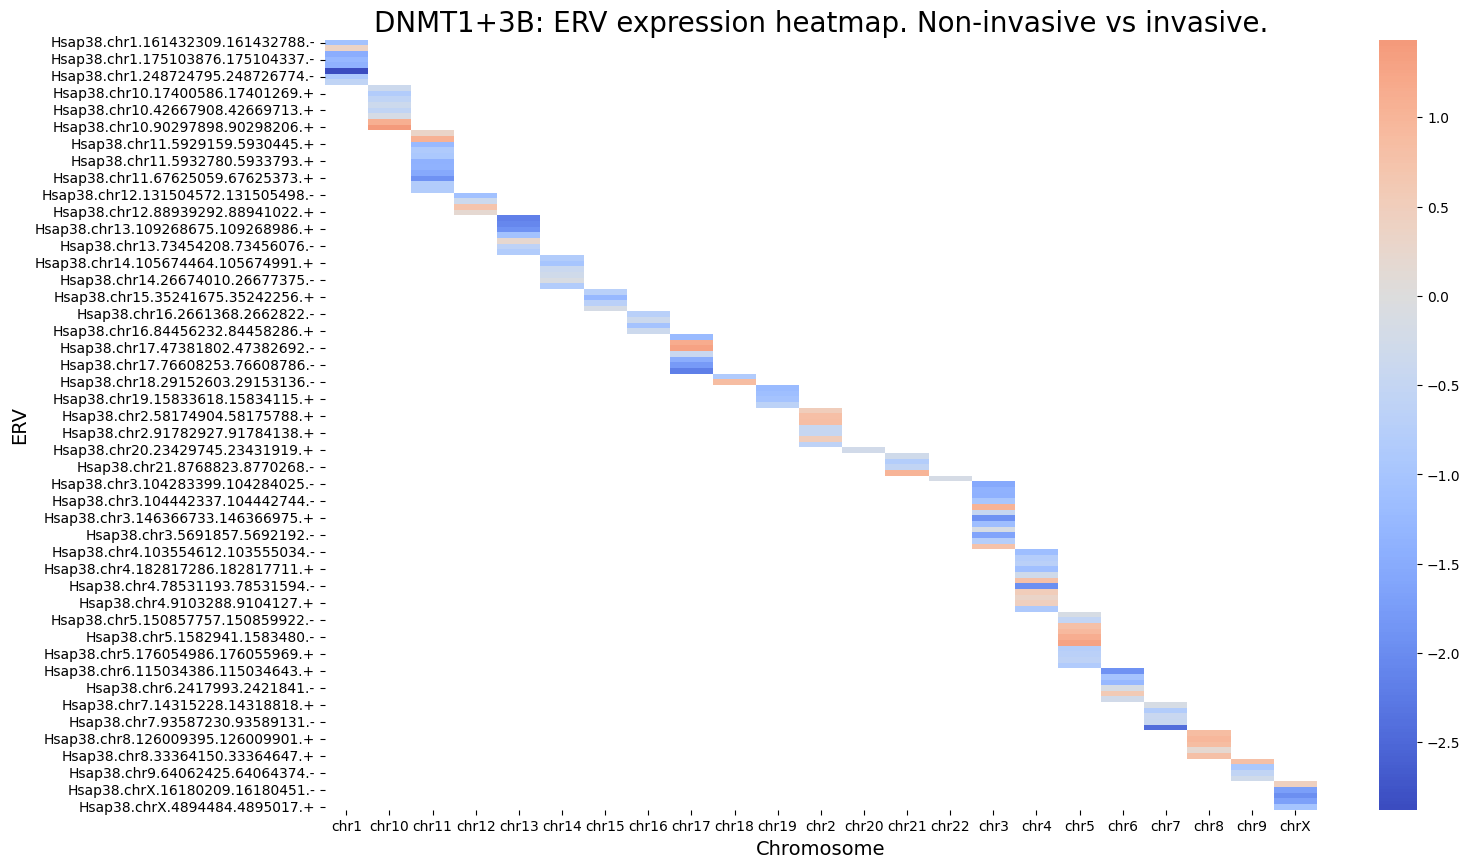

In [95]:
#TRY TO PERFORM GROUPING BASED ON FAMITLY ID !!
#FIRST LOG TRANSFORM THEN DIFFERENCE - can't do the other way around, because i cant log the negative numbers
#mask = heatmap_full != 0
# Mask to hide zero values
mask = heatmap_full != 0

# Increase the figure size
plt.figure(figsize=(16, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)
# 
# Plot heatmap using seaborn
sns.heatmap(heatmap_full, cmap='coolwarm', mask=~mask, center=0)

# Add title and labels
plt.title('DNMT1+3B: ERV expression heatmap. Non-invasive vs invasive.', fontsize = 20)
plt.xlabel('Chromosome', fontsize = 14)
plt.ylabel('ERV', fontsize = 14)

# Save plot with a tight layout to prevent cutoff
plt.savefig('DNMT1_heatmap.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

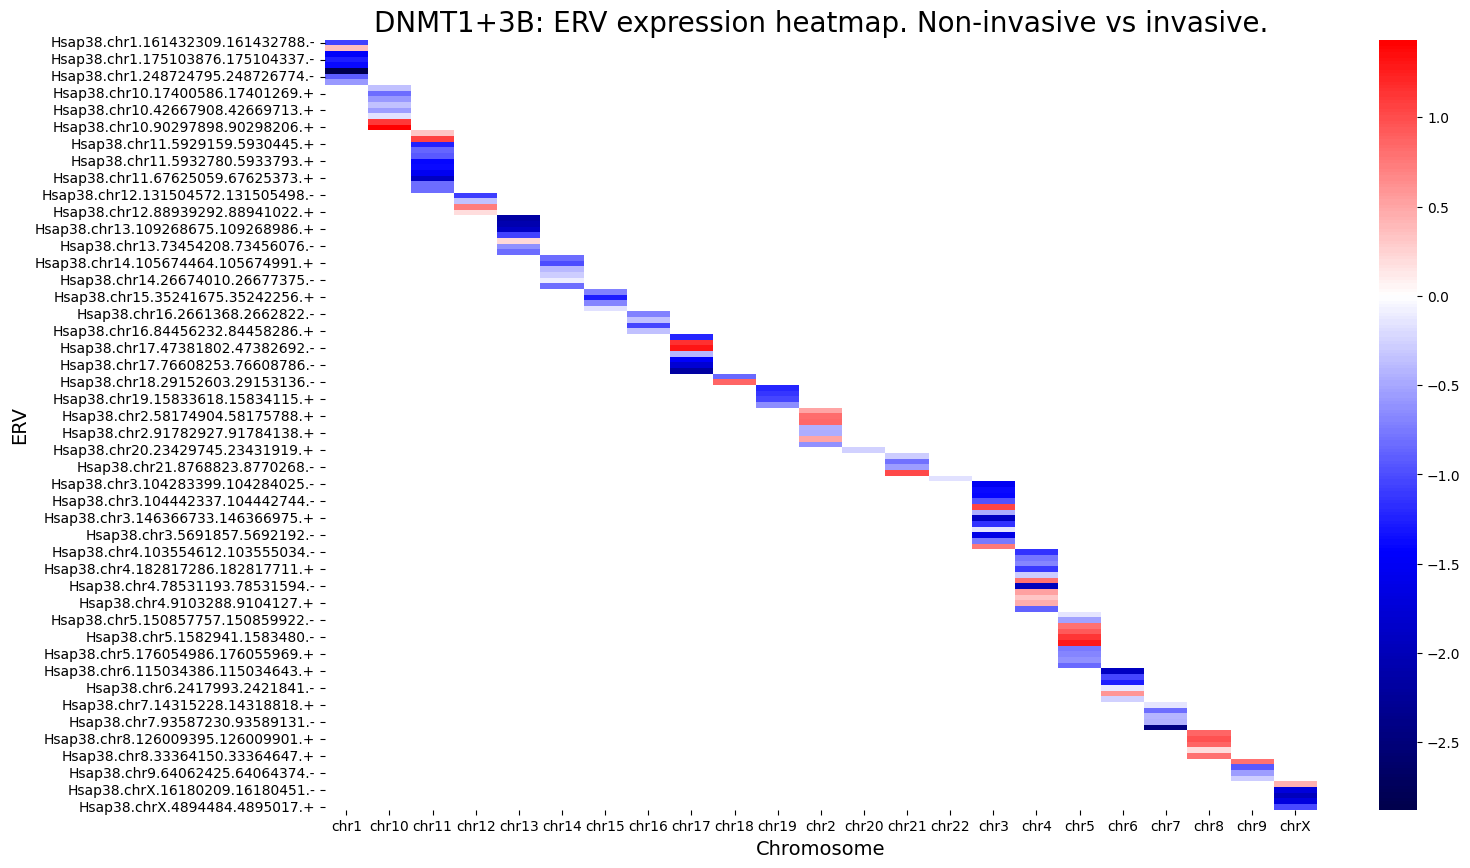

In [96]:
#TRY TO PERFORM GROUPING BASED ON FAMITLY ID !!
#FIRST LOG TRANSFORM THEN DIFFERENCE - can't do the other way around, because i cant log the negative numbers
#mask = heatmap_full != 0
# Mask to hide zero values
mask = filtered_data != 0

# Increase the figure size
plt.figure(figsize=(16, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)
# 
# Plot heatmap using seaborn
sns.heatmap(filtered_data, cmap='seismic', mask=~mask, center=0)

# Add title and labels
plt.title('DNMT1+3B: ERV expression heatmap. Non-invasive vs invasive.', fontsize = 20)
plt.xlabel('Chromosome', fontsize = 14)
plt.ylabel('ERV', fontsize = 14)

# Save plot with a tight layout to prevent cutoff
#plt.savefig('DNMT1_heatmap.jpg', dpi=300, bbox_inches='tight')

# Show plot
plt.show()

In [18]:
sorted_df = full_df.groupby('chrom').apply(lambda x: x.sort_values(by='start'))

# If you want to reset the index after sorting
sorted_df.reset_index(drop=True, inplace=True)
print(sorted_df)

                               gene_id   TPM  patient_id chrom      start
0    Hsap38.chr1.161432309.161432788.-  1.15           1  chr1  161432309
1    Hsap38.chr1.161432309.161432788.-  4.18           4  chr1  161432309
2    Hsap38.chr1.161432309.161432788.-  0.49           2  chr1  161432309
3    Hsap38.chr1.161432309.161432788.-  4.16           3  chr1  161432309
4    Hsap38.chr1.174844047.174847295.-  0.61           1  chr1  174844047
..                                 ...   ...         ...   ...        ...
539      Hsap38.chrX.4542780.4543313.-  6.49           3  chrX    4542780
540      Hsap38.chrX.4894484.4895017.+  0.14           2  chrX    4894484
541      Hsap38.chrX.4894484.4895017.+  0.00           1  chrX    4894484
542      Hsap38.chrX.4894484.4895017.+  2.07           3  chrX    4894484
543      Hsap38.chrX.4894484.4895017.+  1.86           4  chrX    4894484

[544 rows x 5 columns]


/tmp/ipykernel_258696/3352429048.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sorted_df = full_df.groupby('chrom').apply(lambda x: x.sort_values(by='start'))


In [31]:
def visualise_ERV_expression_gropus(df, filename, threshold = True , split_by_chrom = False):
    plt.figure(figsize=(30, 30)) 

    palette = {1: 'red', 2: 'red', 3: 'blue', 4: 'blue'}

    if split_by_chrom == True:
        
    else:    
        sns.barplot(data=df, x='gene_id', y='TPM', hue='patient_id', palette=palette)
    #sns.barplot(data=df, x='gene_id', y='expected_count', hue='patient_id', palette=palette)
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with RSEM')

    # Adding legend
    plt.legend(title='cell ID', loc='upper right')

    if threshold == True:
        plt.xticks(rotation=90)
    #plt.savefig(filename)
    plt.show()    

In [51]:
def visualise_ERV_expression_gropus_2(df, filename, threshold=True, split_by_chrom=False):
    palette = {1: 'red', 2: 'red', 3: 'blue', 4: 'blue'}

    if split_by_chrom:
        # Group data by chromosome
        chrom_groups = df.groupby('chrom')
        num_chroms = len(chrom_groups)

        fig, axes = plt.subplots(num_chroms, 1, figsize=(30, 10*num_chroms), sharex=True)

        for i, (chrom, group) in enumerate(chrom_groups):
            ax = axes[i] if num_chroms > 1 else axes
            
            sns.barplot(data=group, x='gene_id', y='TPM', hue='patient_id', palette=palette, ax=ax)
            ax.set_title(f'Chromosome {chrom}')
            ax.set_xlabel('ERV id')
            ax.set_ylabel('Count')
            ax.legend(title='Cell ID', loc='upper right')
#            if threshold:
#                ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
        plt.subplots_adjust(hspace=0.5)  # Adjust spacing between subplots
        plt.savefig(filename)
        plt.show()
    else:    
        sns.barplot(data=df, x='gene_id', y='TPM', hue='patient_id', palette=palette)
        plt.xlabel('ERV id')
        plt.ylabel('Count')
        plt.title('ERV expression levels measured with RSEM')
        plt.legend(title='Cell ID', loc='upper right')
        if threshold:
            plt.xticks(rotation=90)
        plt.savefig(filename)
        plt.show()


In [1]:
from PIL import Image

def merge_images(image_files, output_filename, subplots_per_row):
    images = [Image.open(img) for img in image_files]
    widths, heights = zip(*(img.size for img in images))

    # Calculate the dimensions of the grid
    num_images = len(images)
    rows = (num_images - 1) // subplots_per_row + 1

    # Calculate the total width and height of the merged image
    max_width = max(widths) * subplots_per_row
    total_height = sum(heights[i] for i in range(0, num_images, subplots_per_row))

    new_image = Image.new('RGB', (max_width, total_height), color=(255, 255, 255))

    y_offset = 0
    for row in range(0, num_images, subplots_per_row):
        max_height_in_row = max(heights[row:row+subplots_per_row])
        x_offset = 0
        for img in images[row:row+subplots_per_row]:
            new_image.paste(img, (x_offset, y_offset))
            x_offset += img.size[0]
        y_offset += max_height_in_row

    new_image.save(output_filename)

def visualise_ERV_expression_gropus_3(df, filename, threshold=True, split_by_chrom=False, subplots_per_row=3):
    palette = {1: 'red', 2: 'red', 3: 'blue', 4: 'blue'}

    if split_by_chrom:
        # Group data by chromosome
        chrom_groups = df.groupby('chrom')
        num_chroms = len(chrom_groups)

        image_files = []

        for chrom, group in chrom_groups:
            # Sort the group by ascending order of 'start' position
            group['start'] = group['start'].astype(int)

            group_sorted = group.sort_values(by='start')
            #print(group_sorted)
            fig, ax = plt.subplots(figsize=(15, 10))
            sns.barplot(data=group_sorted, x='gene_id', y='TPM', hue='patient_id', palette=palette, ax=ax)
            ax.set_title(f'Chromosome {chrom}')
            ax.set_xlabel('ERV id')
            ax.set_ylabel('TPM')
            ax.legend(title='Cell ID', loc='upper right')
            if threshold:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=10)

            # Save each subplot individually
            img_filename = f'{filename}_{chrom}.png'
            plt.savefig(img_filename)
            plt.close()  # Close the current figure to prevent memory issues
            
            image_files.append(img_filename)

        # Merge the saved images into a single grid
        merge_images(image_files, f'{filename}_merged.png', subplots_per_row)

        # Remove individual subplot images
        for img_file in image_files:
            os.remove(img_file)

    else:    
        sns.barplot(data=df, x='gene_id', y='TPM', hue='patient_id', palette=palette)
        plt.xlabel('ERV id')
        plt.ylabel('Count')
        plt.title('ERV expression levels measured with RSEM')
        plt.legend(title='Cell ID', loc='upper right')
        if threshold:
            plt.xticks(rotation=90)
        plt.savefig(filename)
        plt.show()


In [2]:
visualise_ERV_expression_gropus_3(sorted_df, 'DNMT1_RSEM_TEtranscriptERV.jpg', split_by_chrom = True)

NameError: name 'sorted_df' is not defined

In [84]:
#visualise_ERV_expression_gropus(full_df, 'DNMT1_RSEM_TEtranscriptERV.jpg')

In [83]:
#visualise_ERV_expression_gropus(full_df, 'DNMT1_RSEM_TEtranscriptERV.jpg')

TEtranscript part


In [51]:
#read in the overexpressed ERVs 
signdiff = ['Hsap38.chr5.103087901.103088227.-', 'Hsap38.chr7.94663299.94664531.+', 'Hsap38.chr7.94664474.94665679.+']


In [52]:
#read in cnt table 
columns = ['gene_id', 'm1', 'm2','m3','m4']
data = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/04_TEtranscripts/DNMT1/DNMT1.cntTable', sep = '\t' , names=columns, header = 1)

In [53]:
overexpressed_ERV = data[data['gene_id'].isin(signdiff)]
print(overexpressed_ERV)

                                 gene_id   m1   m2  m3  m4
52599  Hsap38.chr5.103087901.103088227.-   41   52  74  97
52600    Hsap38.chr7.94663299.94664531.+   70   22   4   2
52601    Hsap38.chr7.94664474.94665679.+  656  595  35  35


In [54]:
def reshape_dataframe(df):
    id_vars = ['gene_id']
    value_vars = [col for col in df.columns if col.startswith('m')]
    
    # Melt the DataFrame
    melted_df = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='patient_id', value_name='count')
    
    # Extract patient_id from column names
    #melted_df['patient_id'] = melted_df['patient_id'].str.split('_', expand=True)[1].astype(int)
    
    return melted_df

In [60]:
df = reshape_dataframe(overexpressed_ERV)
print(df)

                              gene_id patient_id  count
0   Hsap38.chr5.103087901.103088227.-         m1     41
1     Hsap38.chr7.94663299.94664531.+         m1     70
2     Hsap38.chr7.94664474.94665679.+         m1    656
3   Hsap38.chr5.103087901.103088227.-         m2     52
4     Hsap38.chr7.94663299.94664531.+         m2     22
5     Hsap38.chr7.94664474.94665679.+         m2    595
6   Hsap38.chr5.103087901.103088227.-         m3     74
7     Hsap38.chr7.94663299.94664531.+         m3      4
8     Hsap38.chr7.94664474.94665679.+         m3     35
9   Hsap38.chr5.103087901.103088227.-         m4     97
10    Hsap38.chr7.94663299.94664531.+         m4      2
11    Hsap38.chr7.94664474.94665679.+         m4     35


In [61]:
def visualise_ERV_expression_gropus(df,  threshold = True):
    plt.figure(figsize=(30, 30)) 

    palette = {'m1': 'red', 'm2': 'red', 'm3': 'blue', 'm4': 'blue'}

    sns.barplot(data=df, x='gene_id', y='count', hue='patient_id', palette=palette)
    
    plt.xlabel('ERV id')
    plt.ylabel('count')

    plt.title('ERV expression levels measured with RSEM')

    # Adding legend
    plt.legend(title='cell ID', loc='upper right')

    if threshold == True:
        plt.xticks(rotation=90)
    plt.savefig('DNMT1_TEtranscript.jpg')
    plt.show()    

In [81]:
#visualise_ERV_expression_gropus(df)

In [ ]:
#SAME ANALYSIS BUT FOR NORMAL GENES

In [92]:
rsem_m1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/1_RNA-Seq_SRR12849888.genes.results', sep = '\t')
rsem_m2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/2_RNA-Seq_SRR12849889.genes.results', sep = '\t')
rsem_m3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/3_RNA-Seq_SRR12849891.genes.results', sep = '\t')
rsem_m4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/4_RNA-Seq_SRR12849892.genes.results', sep = '\t')

In [93]:
rsem_erv_1 = filter_zero_expr(rsem_erv_1)
rsem_erv_2 = filter_zero_expr(rsem_erv_2)
rsem_erv_3 = filter_zero_expr(rsem_erv_3)
rsem_erv_4 = filter_zero_expr(rsem_erv_4)

In [95]:
#read in the overexpressed ERVs that we got form DESEQ2 
file = open('gene_names.txt')

overexpressed_genes = file.read() 
overexpressed_genes_list = overexpressed_genes.split('\n')[:-1]

In [96]:
rsem_erv_1 = rsem_m1[rsem_m1['gene_id'].isin(overexpressed_genes_list)]
rsem_erv_2 = rsem_m2[rsem_m2['gene_id'].isin(overexpressed_genes_list)]
rsem_erv_3 = rsem_m3[rsem_m3['gene_id'].isin(overexpressed_genes_list)]
rsem_erv_4 = rsem_m4[rsem_m4['gene_id'].isin(overexpressed_genes_list)]

               gene_id                                   transcript_id(s)  \
11     ENSG00000001461  ENST00000003912,ENST00000339255,ENST0000035802...   
17     ENSG00000001630  ENST00000003100,ENST00000422867,ENST0000045072...   
18     ENSG00000001631  ENST00000340022,ENST00000394503,ENST0000039450...   
24     ENSG00000002587    ENST00000002596,ENST00000510712,ENST00000514690   
26     ENSG00000002745                    ENST00000222462,ENST00000361301   
...                ...                                                ...   
60520  ENSG00000288552                                    ENST00000661729   
60526  ENSG00000288558  ENST00000379119,ENST00000673665,ENST0000067368...   
60537  ENSG00000288569                    ENST00000445770,ENST00000611331   
60624  ENSG00000288681                                    ENST00000399815   
60652  ENSG00000288714    ENST00000682976,ENST00000683950,ENST00000684511   

        length  effective_length  expected_count     TPM   FPKM  
11     49

In [107]:
#NEED TO FIND THE POSITION OF THE GENES ON CHROMOSOMES
sample_list = [rsem_erv_1, rsem_erv_2, rsem_erv_3, rsem_erv_4]
#columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'TPM', 'FPKM']
columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'expected_count', 'FPKM']

ctr = 1
full_df = pd.DataFrame()

for sample in sample_list:
    sample = sample.copy()
    sample['patient_id'] = ctr
    sample.drop(columns=columns_to_drop, inplace=True)
    #print(mouse)
    full_df = pd.concat([full_df, sample], ignore_index=True)
    ctr += 1

print(full_df)

               gene_id     TPM  patient_id
0      ENSG00000001461    4.75           1
1      ENSG00000001630  190.46           1
2      ENSG00000001631   36.60           1
3      ENSG00000002587    0.37           1
4      ENSG00000002745   27.24           1
...                ...     ...         ...
21647  ENSG00000288552    2.75           4
21648  ENSG00000288558    4.18           4
21649  ENSG00000288569    0.34           4
21650  ENSG00000288681   13.86           4
21651  ENSG00000288714    1.54           4

[21652 rows x 3 columns]


In [108]:
full_df = extract_chrom(full_df)
print(full_df)

               gene_id     TPM  patient_id chrom
0      ENSG00000001461    4.75           1   NaN
1      ENSG00000001630  190.46           1   NaN
2      ENSG00000001631   36.60           1   NaN
3      ENSG00000002587    0.37           1   NaN
4      ENSG00000002745   27.24           1   NaN
...                ...     ...         ...   ...
21647  ENSG00000288552    2.75           4   NaN
21648  ENSG00000288558    4.18           4   NaN
21649  ENSG00000288569    0.34           4   NaN
21650  ENSG00000288681   13.86           4   NaN
21651  ENSG00000288714    1.54           4   NaN

[21652 rows x 4 columns]


In [90]:
visualise_ERV_expression_gropus(full_df, 'DNMT1_RSEM_genes.jpg', split_by_chrom = True)

/tmp/ipykernel_3282464/297429816.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
/tmp/ipykernel_3282464/297429816.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
/tmp/ipykernel_3282464/297429816.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
/tmp/ipykernel_3282464/297429816.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=10)
/tmp/ipykernel_3282464/297429816.py:44: UserWarning: set_ticklabels() should only be used with a fixed n

VISUALISING THE METHYLATION

In [219]:
#PREPARE EXPRESSION DATA FOR GSEA
rsem_m1 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/1_RNA-Seq_SRR12849888.genes.results', sep = '\t')
rsem_m2 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/2_RNA-Seq_SRR12849889.genes.results', sep = '\t')
rsem_m3 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/3_RNA-Seq_SRR12849891.genes.results', sep = '\t')
rsem_m4 = pd.read_csv('/work/iku/exp1019-cancer-epigenetics-and-ervs/01_BS_and_ERV/results/03_rsem/raw/DNMT1/4_RNA-Seq_SRR12849892.genes.results', sep = '\t')

In [220]:
#print(rsem_m1)

In [221]:
columns_to_drop = ['transcript_id(s)', 'length', 'effective_length', 'expected_count', 'FPKM']
sample_list = [rsem_m1, rsem_m2, rsem_m3, rsem_m4]
rownames = rsem_m1['gene_id'].tolist()
full_df = pd.DataFrame(index = rownames)

In [222]:
import pandas as pd

# Initialize an empty DataFrame to store concatenated samples
full_df = pd.DataFrame()

ctr = 1
for sample in sample_list:
    # Make a copy of the sample
    sample = sample.copy()
    
    # Drop columns
    sample.drop(columns=columns_to_drop, inplace=True)
    
    # Rename columns
    exp_count = 'h' + str(ctr)
    sample.rename(columns={'TPM': exp_count}, inplace=True)
    
    # Concatenate samples row-wise
    full_df = pd.concat([full_df, sample[exp_count]], axis=1)
    
    # Increment counter
    ctr += 1

   

In [223]:
def filter_zero_expr(df):
    df_cp = df.copy()
    df_cp = df_cp[df_cp['TPM'] > 0 ]
    return df_cp

In [224]:
full_df.index = rownames 
# Assuming your DataFrame is named full_df

# Create a boolean mask to identify rows where all values in columns 'h1', 'h2', 'h3', and 'h4' are equal to 0
rows_to_drop = full_df[(full_df[['h1', 'h2', 'h3', 'h4']] == 0).all(axis=1)].index

# Drop the rows
full_df.drop(index=rows_to_drop, inplace=True)



full_df.insert(0, 'description', 'na')
# Assuming your DataFrame is named full_df

# Get the columns to drop where all values in columns 'h1', 'h2', 'h3', and 'h4' are zeros


print(full_df)

                              description      h1      h2      h3      h4
ENSG00000000003                        na   44.30   46.11   38.71   50.85
ENSG00000000419                        na  179.11  204.34  116.02  171.21
ENSG00000000457                        na    7.78    8.13    7.44    7.23
ENSG00000000460                        na   33.39   32.96   28.87   34.38
ENSG00000000938                        na    0.04    0.06    0.12    0.14
...                                   ...     ...     ...     ...     ...
Hsap38.chrY.7154324.7157755.-          na    0.00    0.00    0.00    0.02
Hsap38.chrY.7251190.7251915.-          na    0.00    0.00    0.07    0.00
Hsap38.chrY.8307051.8308085.-          na    0.00    0.00    0.00    0.08
Hsap38.chrY.9635388.9636398.+          na    0.00    0.06    0.00    0.00
Hsap38.chrY.9943672.9946497.+          na    0.00    0.00    0.03    0.02

[42532 rows x 5 columns]


In [225]:
full_df.to_csv('GSEA_expr.txt', sep = '\t')

In [1]:
ERVS = full_df[full_df.index.str.startswith('Hsap38')]
ERV_list = ERVS.index.tolist()
print(len(ERV_list))
#print(ERV_list)

NameError: name 'full_df' is not defined

In [159]:
# prepare gene set in .grp format 
# File path
file_path = 'gene_set.grp'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write each element of the list to the file
    for element in ERV_list:
        file.write(element + '\n')


In [160]:
#prepare gene set files in .grp format